### Stage C Quiz Code 

### Dataset Description

Predictive features:

1. 'tau1' to 'tau4': the reaction time of each network participant, a real value within the range 0.5 to 10 ('tau1' corresponds to the supplier node, 'tau2' to 'tau4' to the consumer nodes);
2. 'p1' to 'p4': nominal power produced (positive) or consumed (negative) by each network participant, a real value within the range -2.0 to -0.5 for consumers ('p2' to 'p4'). As the total power consumed equals the total power generated, p1 (supplier node) = - (p2 + p3 + p4);
3. 'g1' to 'g4': price elasticity coefficient for each network participant, a real value within the range 0.05 to 1.00 ('g1' corresponds to the supplier node, 'g2' to 'g4' to the consumer nodes; 'g' stands for 'gamma');

Dependent variables:

1. 'stab': the maximum real part of the characteristic differential equation root (if positive, the system is linearly unstable; if negative, linearly stable);
2. 'stabf': a categorical (binary) label ('stable' or 'unstable').

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
uci_df = pd.read_csv('files/Data_for_UCI_named.csv')
uci_df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [3]:
#description of the data
uci_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [4]:
#drop 'stab' because of the direct relationship with 'stabf'
uci_df = uci_df.drop('stab', axis =1)

In [5]:
#check distribution of target variable
uci_df['stabf'].value_counts()

unstable    6380
stable      3620
Name: stabf, dtype: int64

In [6]:
uci_df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,unstable


In [7]:
#get features and labels
x = uci_df.drop(columns=['stabf'])
y = uci_df['stabf']

In [8]:
#Split the dataset into an 80:20 train-test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [9]:
#Standard scaler
#ignore the y variable since it is an object type.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

normalised_train_df = scaler.fit_transform(x_train)
normalised_train_df = pd.DataFrame(normalised_train_df, columns = x_train.columns)

normalised_test_df = scaler.transform(x_test)
normalised_test_df = pd.DataFrame(normalised_test_df, columns = x_test.columns)

### Building Models

#### RandomForestClassifier

In [10]:
#train a RandomForestClassifier 
from sklearn.ensemble import RandomForestClassifier

randf = RandomForestClassifier(random_state = 1)

#fit on train set
randf.fit(normalised_train_df, y_train)

#make predictions on test set
randf_pred = randf.predict(normalised_test_df)

#### Measuring Model Performance for RandomForestClassifier

In [11]:
#model accuracy
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, randf_pred)
print('Accuracy: {}'.format(round(accuracy*100), 2))

#classification report
print('Classification Report:\n', classification_report(y_test,randf_pred, digits =4))

Accuracy: 93
Classification Report:
               precision    recall  f1-score   support

      stable     0.9191    0.8778    0.8980       712
    unstable     0.9341    0.9573    0.9456      1288

    accuracy                         0.9290      2000
   macro avg     0.9266    0.9176    0.9218      2000
weighted avg     0.9288    0.9290    0.9286      2000



#### ExtraTreeClassifier

In [12]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier(random_state = 1)

#fit on the train set
etc.fit(normalised_train_df, y_train)

#predict on test set
etc_pred = etc.predict(normalised_test_df)

#### Measuring Model Performance for ExtraTreeClassifier

In [13]:
#model accuracy
etc_accuracy = accuracy_score(y_test, etc_pred)
print('Accuracy: {}'.format(round(etc_accuracy*100), 2))

#classification report
print('Classification Report:\n', classification_report(y_test,etc_pred, digits =4))

Accuracy: 93
Classification Report:
               precision    recall  f1-score   support

      stable     0.9410    0.8511    0.8938       712
    unstable     0.9218    0.9705    0.9455      1288

    accuracy                         0.9280      2000
   macro avg     0.9314    0.9108    0.9197      2000
weighted avg     0.9287    0.9280    0.9271      2000



### LightGBM Classifier

In [14]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(random_state = 1)

#fit on train set
lgbm.fit(normalised_train_df, y_train)

#predict on test set
lgbm_pred = lgbm.predict(normalised_test_df)

#### Model Performance for LGBM Classifier

In [15]:
#model accuracy
lgbm_accuracy = accuracy_score(y_test, lgbm_pred)
print('Accuracy: {}'.format(round(lgbm_accuracy*100), 2))

#classification report
print('Classification Report:\n', classification_report(y_test,lgbm_pred, digits =4))

Accuracy: 94
Classification Report:
               precision    recall  f1-score   support

      stable     0.9276    0.9003    0.9138       712
    unstable     0.9458    0.9612    0.9534      1288

    accuracy                         0.9395      2000
   macro avg     0.9367    0.9307    0.9336      2000
weighted avg     0.9393    0.9395    0.9393      2000



### XGBoost Classifier

In [16]:
from xgboost import XGBClassifier
xbg = XGBClassifier(random_state=1)

#fit on train set
xbg.fit(normalised_train_df, y_train)

#predict on test set
xbg_pred = xbg.predict(normalised_test_df)

#### Measuring Model Performace for XGB Classifier

In [17]:
#Accuracy
xbg_accuracy = accuracy_score(y_test, xbg_pred)
print('Accuracy: {}'.format(round(xbg_accuracy*100), 2))

#Classification report
print('Classification Report:\n', classification_report(y_test,xbg_pred, digits =4))

Accuracy: 92
Classification Report:
               precision    recall  f1-score   support

      stable     0.9206    0.8469    0.8822       712
    unstable     0.9190    0.9596    0.9389      1288

    accuracy                         0.9195      2000
   macro avg     0.9198    0.9033    0.9105      2000
weighted avg     0.9195    0.9195    0.9187      2000



#### Improving ExtraTreesClassifier

In [18]:
#combination of hyperparameters
n_estimators = [50, 100, 300, 500, 1000]
min_samples_split = [2, 3, 5, 7, 9]
min_samples_leaf = [1, 2, 4, 6, 8]

max_features = ['auto', 'sqrt', 'log2', None] 
hyperparameter_grid = {'n_estimators': n_estimators,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}

In [19]:
from sklearn.model_selection import RandomizedSearchCV

#set up randomsearch with 5folds

etc_random = RandomizedSearchCV(estimator = etc, 
                              param_distributions = hyperparameter_grid, cv=5, n_iter=10, 
                                scoring = 'accuracy', n_jobs = -1, verbose = 1,
                              random_state = 1)

In [20]:
#fit on the training data
search = etc_random.fit(normalised_train_df, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [21]:
#get best parameters
search.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 8,
 'max_features': None}

In [22]:
#Evaluate ExtraTreesClassifier on test set using  best params
etc = ExtraTreesClassifier(max_features = None, 
                            min_samples_leaf= 8,
                            min_samples_split= 2,
                            n_estimators= 1000, 
                            random_state = 1)

#fit on train set
etc.fit(normalised_train_df, y_train)

#predict on test set
etc_pred = etc.predict(normalised_test_df)

In [23]:
#classification report for the hyperparameter tuning
print('Classification Report:\n', classification_report(y_test,etc_pred, digits =4))

Classification Report:
               precision    recall  f1-score   support

      stable     0.9211    0.8694    0.8945       712
    unstable     0.9300    0.9589    0.9442      1288

    accuracy                         0.9270      2000
   macro avg     0.9256    0.9141    0.9193      2000
weighted avg     0.9268    0.9270    0.9265      2000



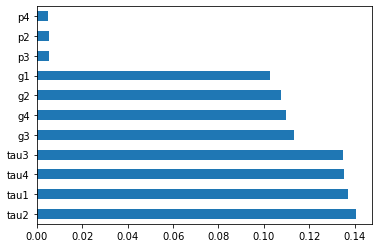

In [24]:
#plot graph of feature importance
feat_importance = pd.Series(etc.feature_importances_, index = x.columns)
feat_importance.nlargest(11).plot(kind='barh')
plt.show()

##### Thanks